In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import pandas as pd 

train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
print(train_df.shape,
test_df.shape)


(7613, 5) (3263, 4)


In [3]:
train_df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test_df.head(20)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [6]:
def transformDataset(df):
    df['X'] = df['text'] + ': ' + df['keyword'].fillna("")
    if 'target' in df.columns:
        df['y'] = df['target']
    else:
        df['y'] = 0
        
    X=df['X']
    y=df['y']
    return X,y
    
    

In [7]:
train_X,train_y = transformDataset(train_df)
train_X

0       Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada: 
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: X, Length: 7613, dtype: object

In [8]:
test_X,test_y = transformDataset(test_df)
test_X


0                    Just happened a terrible car crash: 
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3              Apocalypse lighting. #Spokane #wildfires: 
4         Typhoon Soudelor kills 28 in China and Taiwan: 
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: X, Length: 3263, dtype: object

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   X         3263 non-null   object
 5   y         3263 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 153.1+ KB


In [10]:
!pip install -q keras_nlp==0.6.3 keras-core==0.1.7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [11]:
import os
os.environ["KERAS_BACKEND"] = "jax"  # "jax" or "tensorflow" or "torch" 
# os.environ["WANDB_SILENT"] = "false" # for wandb

import keras_nlp
import keras_core as keras
import keras_core.backend as K


import torch
# import jax
import tensorflow as tf
# from tensorflow import keras
# import tensorflow.keras.backend as K

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.cm.get_cmap('coolwarm')

2024-03-14 17:17:19.381077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 17:17:19.381184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 17:17:19.535683: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using JAX backend.


/tmp/ipykernel_26/1781136277.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('coolwarm')


In [12]:
class CFG:
    verbose = 0  # Verbosity
    
    wandb = True  # Weights & Biases logging
    competition = 'llm-detect-ai-generated-text'  # Competition name
    _wandb_kernel = 'awsaf49'  # WandB kernel
    comment = 'DebertaV3-MaxSeq_200-ext_s-torch'  # Comment description
    
    preset = "deberta_v3_base_en"  # Name of pretrained models
    sequence_length = 160  # Input sequence length
    
    device = 'GPU'  # Device
    
    seed = 42  # Random seed
    
    num_folds = 5  # Total folds
    selected_folds = [0, 1]  # Folds to train on
    
    epochs = 3 # Training epochs
    batch_size = 3  # Batch size
    drop_remainder = True  # Drop incomplete batches
    cache = True # Caches data after one iteration, use only with `TPU` to avoid OOM
    
    scheduler = 'cosine'  # Learning rate scheduler
    
#     class_names = ["real", "fake"]  # Class names [A, B, C, D, E]
#     num_classes = len(class_names)  # Number of classes
#     class_labels = list(range(num_classes))  # Class labels [0, 1, 2, 3, 4]
#     label2name = dict(zip(class_labels, class_names))  # Label to class name mapping
#     name2label = {v: k for k, v in label2name.items()}  # Class name to label mapping

In [13]:
keras.utils.set_random_seed(CFG.seed)

In [14]:
train_y.value_counts()

y
0    4342
1    3271
Name: count, dtype: int64

In [15]:
def get_device():
    "Detect and intializes GPU/TPU automatically"
    try:
        # detect and init the TPU
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

        # instantiate a distribution strategy
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.TPUStrategy(tpu)
        print(f'> Running on TPU', tpu.master(), end=' | ')
        print('Num of TPUs: ', strategy.num_replicas_in_sync)
        device=CFG.device
    except:
        # If TPU is not available, detect GPUs
        gpus = tf.config.list_logical_devices('GPU')
        ngpu = len(gpus)
         # Check number of GPUs
        if ngpu:
            # Set GPU strategy
            strategy = tf.distribute.MirroredStrategy(gpus) # single-GPU or multi-GPU
            # Print GPU details
            print("> Running on GPU", end=' | ')
            print("Num of GPUs: ", ngpu)
            device='GPU'
        else:
            # If no GPUs are available, use CPU
            print("> Running on CPU")
            strategy = tf.distribute.get_strategy()
            device='CPU'
    return strategy, device

In [16]:
# Initialize GPU/TPU/TPU-VM
strategy, CFG.device = get_device()
CFG.replicas = strategy.num_replicas_in_sync

> Running on GPU | Num of GPUs:  1


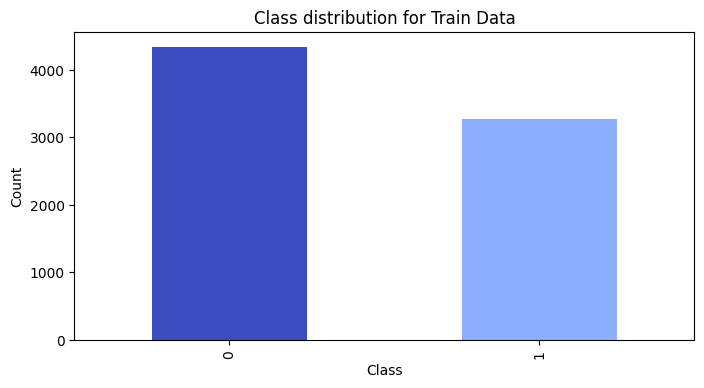

In [17]:
#df = pd.read_csv(f'{BASE_PATH}/train_essays.csv')  # Read CSV file into a DataFrame
#df['label'] = df.generated.copy()
#df['name'] = df.generated.map(CFG.label2name)  # Map answer labels using name-to-label mapping

# Display information about the train data
#print("# Train Data: {:,}".format(len(df)))
#print("# Sample:")
#display(df.head(2))

# Show distribution of answers using a bar plot

plt.figure(figsize=(8, 4))
train_y.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

In [18]:
preprocessor = keras_nlp.models.DebertaV3Preprocessor.from_preset(
    preset=CFG.preset, # Name of the model
    sequence_length=CFG.sequence_length, # Max sequence length, will be padded if shorter
)

2464616/2464616 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step       


In [19]:
def preprocess_fn(text, label=None):
    text = preprocessor(text)  # Preprocess text
    return (text, label) if label is not None else text  # Return processed text and label if available

In [20]:
def get_datasets(fold):
    train_df = df[df.fold!=fold].sample(frac=1)  # Get training fold data
        
    train_texts = train_df.X.tolist()  # Extract training texts
    train_labels = train_df.y.tolist()  # Extract training labels
    
    # Build training dataset
    train_ds = build_dataset(train_texts, train_labels,
                             batch_size=CFG.batch_size*CFG.replicas, cache=CFG.cache,
                             shuffle=True, drop_remainder=True, repeat=True)

    valid_df = df[df.fold==fold].sample(frac=1)  # Get validation fold data
    valid_texts = valid_df.X.tolist()  # Extract validation texts
    valid_labels = valid_df.y.tolist()  # Extract validation labels
    
    # Build validation dataset
    valid_ds = build_dataset(valid_texts, valid_labels,
                             batch_size=min(CFG.batch_size*CFG.replicas, len(valid_df)), cache=CFG.cache,
                             shuffle=False, drop_remainder=True, repeat=False)
    
    return (train_ds, train_df), (valid_ds, valid_df)  # Return datasets and dataframes

In [21]:
!pip install wandb

In [22]:
import wandb  # Import wandb library for experiment tracking

try:
    from kaggle_secrets import UserSecretsClient  # Import UserSecretsClient
    user_secrets = UserSecretsClient()  # Create secrets client instance
    api_key = user_secrets.get_secret("WANDB")  # Get API key from Kaggle secrets
    wandb.login(key=api_key)  # Login to wandb with the API key
    anonymous = None  # Set anonymous mode to None
except:
    anonymous = 'must'  # Set anonymous mode to 'must'
    wandb.login(anonymous=anonymous, relogin=True)  # Login to wandb anonymously and relogin if needed

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [23]:
def wandb_init(fold):
    config = {k: v for k, v in dict(vars(CFG)).items() if '__' not in k}  # Create config dictionary
    config.update({"fold": int(fold)})  # Add fold to config
    run = wandb.init(project="dist-tweet-classification",
                     name=f"fold-{fold}|max_seq-{CFG.sequence_length}|model-{CFG.preset}",
                     config=config,
                     group=CFG.comment,
                     save_code=True)
    return run

# Log best result for error analysis
def log_wandb():
    wandb.log({'best_auc': best_auc, 'best_loss': best_loss, 'best_epoch': best_epoch})

# Fetch W&B callbacks
def get_wb_callbacks(fold):
    wb_metr = wandb.keras.WandbMetricsLogger()
    return [wb_metr]  # Return WandB callbacks

In [24]:
import math

def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 0.6e-6, 0.5e-6 * batch_size, 0.3e-6
    lr_ramp_ep, lr_sus_ep, lr_decay = 1, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()

    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr callback

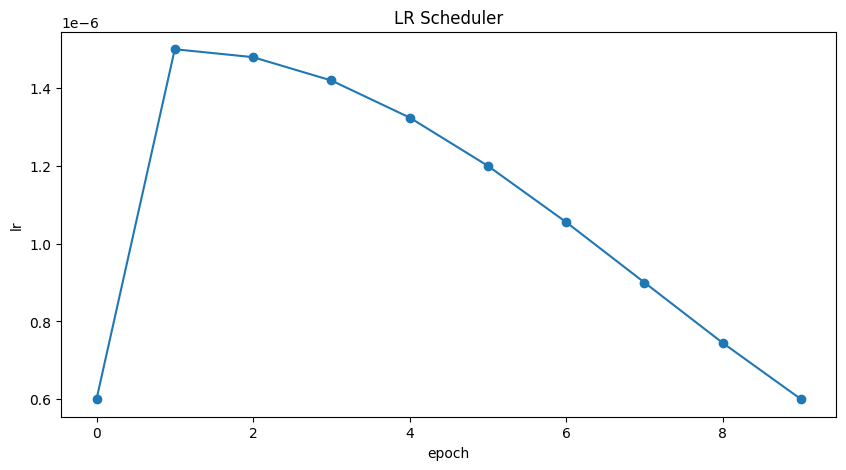

In [25]:
_=get_lr_callback(CFG.batch_size*CFG.replicas, plot=True)

In [26]:
def get_callbacks(fold):
    callbacks = []
    lr_cb = get_lr_callback(CFG.batch_size*CFG.replicas)  # Get lr callback
    ckpt_cb = keras.callbacks.ModelCheckpoint(f'fold{fold}.keras',
                                              monitor='val_auc',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              mode='max')  # Get Model checkpoint callback
    callbacks.extend([lr_cb, ckpt_cb])  # Add lr and checkpoint callbacks

    if CFG.wandb:  # If WandB is enabled
        wb_cbs = get_wb_callbacks(fold)  # Get WandB callbacks
        callbacks.extend(wb_cbs) 
        
    return callbacks  # Return the list of callbacks

In [27]:
def build_model():
    # Create a DebertaV3Classifier model
    classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset,
        preprocessor=None,
        num_classes=1 # one output per one option, for five options total 5 outputs
    )
    inputs = classifier.input
    logits = classifier(inputs)
        
    # Compute final output
    outputs = keras.layers.Activation("sigmoid")(logits)
    model = keras.Model(inputs, outputs)
    
    # Compile the model with optimizer, loss, and metrics
    model.compile(
        optimizer=keras.optimizers.AdamW(5e-6),
        loss=keras.losses.BinaryCrossentropy(label_smoothing=0.02),
        metrics=[
            keras.metrics.AUC(name="auc"),
        ],
        jit_compile=True
    )
    return model

In [28]:
model = build_model()

735557816/735557816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [29]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask        │ (None, None)      │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ token_ids           │ (None, None)      │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ deberta_v3_classif… │ (None, 1)         │ 184,42… │ padding_mask[0][0],  │
│ (DebertaV3Classifi… │                   │         │ token_ids[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation          │ (None, 1)         │       0 │ deberta_v3_classifi… │
│ (Activation)        │                   │         │                      │
└─────────────────────┴───────────────────┴─────────┴──────────────────────┘

 Total params: 184,422,913 (703.52 MB)

 Trainable params: 184,422,913 (703.52 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#

In [31]:
df = pd.concat([train_X, train_y], axis=1)

In [32]:
df.head()

,X,y
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada:,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [33]:
from sklearn.model_selection import StratifiedKFold  # Import package

skf = StratifiedKFold(n_splits=CFG.num_folds, shuffle=True, random_state=CFG.seed)  # Initialize K-Fold

df = df.reset_index(drop=True)  # Reset dataframe index

df['stratify'] = df.y.astype(str)

df["fold"] = -1  # New 'fold' column

# Assign folds using StratifiedKFold
for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['stratify'])):
    df.loc[val_idx, 'fold'] = fold

# Display label distribution for each fold
df.groupby(["fold", "y",]).size()

fold  y
0     0    868
      1    655
1     0    869
      1    654
2     0    869
      1    654
3     0    868
      1    654
4     0    868
      1    654
dtype: int64

In [34]:
def build_dataset(texts, labels=None, batch_size=32,
                  cache=False, drop_remainder=True,
                  repeat=False, shuffle=1024):
    AUTO = tf.data.AUTOTUNE  # AUTOTUNE option
    slices = (texts,) if labels is None else (texts, labels)  # Create slices
    ds = tf.data.Dataset.from_tensor_slices(slices)  # Create dataset from slices
    ds = ds.cache() if cache else ds  # Cache dataset if enabled
    ds = ds.map(preprocess_fn, num_parallel_calls=AUTO)  # Map preprocessing function
    ds = ds.repeat() if repeat else ds  # Repeat dataset if enabled
    opt = tf.data.Options()  # Create dataset options
    if shuffle: 
        ds = ds.shuffle(shuffle, seed=CFG.seed)  # Shuffle dataset if enabled
        opt.experimental_deterministic = False
    ds = ds.with_options(opt)  # Set dataset options
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)  # Batch dataset
    ds = ds.prefetch(AUTO)  # Prefetch next batch
    return ds  # Return the built dataset

In [35]:
wandb.login()

wandb: Currently logged in as: anony-mouse-374958880726015426. Use `wandb login --relogin` to force relogin


True

In [36]:
for fold in CFG.selected_folds:
    # Initialize Weights and Biases if enabled
    if CFG.wandb:
        run = wandb_init(fold)

    # Get train and validation datasets
    (train_ds, train_df), (valid_ds, valid_df) = get_datasets(fold)
    
    # Get callback functions for training
    callbacks = get_callbacks(fold)

    # Print training information
    print('#' * 50)
    print(f'\tFold: {fold + 1} | Model: {CFG.preset}\n\tBatch Size: {CFG.batch_size * CFG.replicas} | Scheduler: {CFG.scheduler}')
    print(f'\tNum Train: {len(train_df)} | Num Valid: {len(valid_df)}')
    print('#' * 50)
    
    # Clear TensorFlow session and build the model within the strategy scope
    K.clear_session()
    with strategy.scope():
        model = build_model()

    # Start training the model
    history = model.fit(
        train_ds,
        epochs=CFG.epochs,
        validation_data=valid_ds,
        callbacks=callbacks,
        steps_per_epoch=int(len(train_df) / CFG.batch_size / CFG.replicas),
    )
    
    # Find the epoch with the best validation accuracy
    best_epoch = np.argmax(model.history.history['val_auc'])
    best_auc = model.history.history['val_auc'][best_epoch]
    best_loss = model.history.history['val_loss'][best_epoch]

    # Print and display best results
    print(f'\n{"=" * 17} FOLD {fold} RESULTS {"=" * 17}')
    print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST AUC   : {best_auc:.3f}\n>>>> BEST Epoch : {best_epoch}')
    print('=' * 50)
    
    # Log best result on Weights and Biases (wandb) if enabled
    if CFG.wandb:
        log_wandb()  # Log results
        wandb.run.finish()  # Finish the run
#         display(ipd.IFrame(run.url, width=1080, height=720)) # show wandb dashboard
    print("\n\n")

wandb: wandb version 0.16.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.3
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240314_171806-v6oqju18
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run fold-0|max_seq-160|model-deberta_v3_base_en
wandb: ⭐️ View project at https://wandb.ai/anony-mouse-374958880726015426/dist-tweet-classification?apiKey=3a64eae6982bcf9d73577d1a1f284774a358b074
wandb: 🚀 View run at https://wandb.ai/anony-mouse-374958880726015426/dist-tweet-classification/runs/v6oqju18?apiKey=3a64eae6982bcf9d73577d1a1f284774a358b074
wandb: WARNING Do NOT share these links with anyone. They can be used to claim your runs.


##################################################
	Fold: 1 | Model: deberta_v3_base_en
	Batch Size: 3 | Scheduler: cosine
	Num Train: 6090 | Num Valid: 1523
##################################################


/opt/conda/lib/python3.10/site-packages/keras_core/src/backend/jax/numpy.py:123: UserWarning: Explicitly requested dtype int64 requested in arange is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.arange(start, stop, step=step, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/keras_core/src/backend/jax/core.py:58: UserWarning: Explicitly requested dtype int64 requested in array is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.array(x, dtype=dtype)


Epoch 1/3
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - auc: 0.6306 - loss: 0.6666

wandb: ERROR Unable to log learning rate.


2030/2030 ━━━━━━━━━━━━━━━━━━━━ 292s 128ms/step - auc: 0.6306 - loss: 0.6666 - val_auc: 0.8772 - val_loss: 0.5007 - learning_rate: 6.0000e-07
Epoch 2/3
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 254s 125ms/step - auc: 0.8449 - loss: 0.4941 - val_auc: 0.8935 - val_loss: 0.4152 - learning_rate: 1.5000e-06
Epoch 3/3
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 253s 124ms/step - auc: 0.8912 - loss: 0.3991 - val_auc: 0.8971 - val_loss: 0.3996 - learning_rate: 1.4796e-06

================= FOLD 0 RESULTS =================
>>>> BEST Loss  : 0.400
>>>> BEST AUC   : 0.897
>>>> BEST Epoch : 2


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:            best_auc ▁
wandb:          best_epoch ▁
wandb:           best_loss ▁
wandb:           epoch/auc ▁▆█
wandb:         epoch/epoch ▁▅█
wandb: epoch/learning_rate ▁██
wandb:          epoch/loss █▃▁
wandb:       epoch/val_auc ▁▇█
wandb:      epoch/val_loss █▂▁
wandb: 
wandb: Run summary:
wandb:            best_auc 0.89706
wandb:          best_epoch 2
wandb:           best_loss 0.39957
wandb:           epoch/auc 0.89813
wandb:         epoch/epoch 2
wandb: epoch/learning_rate 0.0
wandb:          epoch/loss 0.39144
wandb:       epoch/val_auc 0.89706
wandb:      epoch/val_loss 0.39957
wandb: 
wandb: 🚀 View run fold-0|max_seq-160|model-deberta_v3_base_en at: https://wandb.ai/anony-mouse-374958880726015426/dist-tweet-classification/runs/v6oqju18?apiKey=3a64eae6982bcf9d73577d1a1f284774a358b074
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 othe

wandb: wandb version 0.16.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.3
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240314_173217-c7z7i9j3
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run fold-1|max_seq-160|model-deberta_v3_base_en
wandb: ⭐️ View project at https://wandb.ai/anony-mouse-374958880726015426/dist-tweet-classification?apiKey=3a64eae6982bcf9d73577d1a1f284774a358b074
wandb: 🚀 View run at https://wandb.ai/anony-mouse-374958880726015426/dist-tweet-classification/runs/c7z7i9j3?apiKey=3a64eae6982bcf9d73577d1a1f284774a358b074
wandb: WARNING Do NOT share these links with anyone. They can be used to claim your runs.


##################################################
	Fold: 2 | Model: deberta_v3_base_en
	Batch Size: 3 | Scheduler: cosine
	Num Train: 6090 | Num Valid: 1523
##################################################
Epoch 1/3
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 284s 126ms/step - auc: 0.5966 - loss: 0.6658 - val_auc: 0.8658 - val_loss: 0.5289 - learning_rate: 6.0000e-07
Epoch 2/3
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 251s 124ms/step - auc: 0.8581 - loss: 0.4714 - val_auc: 0.8974 - val_loss: 0.3986 - learning_rate: 1.5000e-06
Epoch 3/3
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 258s 127ms/step - auc: 0.8936 - loss: 0.3901 - val_auc: 0.9006 - val_loss: 0.3936 - learning_rate: 1.4796e-06

================= FOLD 1 RESULTS =================
>>>> BEST Loss  : 0.394
>>>> BEST AUC   : 0.901
>>>> BEST Epoch : 2


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:            best_auc ▁
wandb:          best_epoch ▁
wandb:           best_loss ▁
wandb:           epoch/auc ▁▇█
wandb:         epoch/epoch ▁▅█
wandb: epoch/learning_rate ▁██
wandb:          epoch/loss █▃▁
wandb:       epoch/val_auc ▁▇█
wandb:      epoch/val_loss █▁▁
wandb: 
wandb: Run summary:
wandb:            best_auc 0.9006
wandb:          best_epoch 2
wandb:           best_loss 0.39358
wandb:           epoch/auc 0.90214
wandb:         epoch/epoch 2
wandb: epoch/learning_rate 0.0
wandb:          epoch/loss 0.37853
wandb:       epoch/val_auc 0.9006
wandb:      epoch/val_loss 0.39358
wandb: 
wandb: 🚀 View run fold-1|max_seq-160|model-deberta_v3_base_en at: https://wandb.ai/anony-mouse-374958880726015426/dist-tweet-classification/runs/c7z7i9j3?apiKey=3a64eae6982bcf9d73577d1a1f284774a358b074
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other 

In [37]:
#test_df.head()

In [38]:
#valid_ds

In [39]:
# predictions = model.predict(
#     valid_ds,
#     batch_size=min(CFG.batch_size * CFG.replicas * 2, len(valid_df)), # max batch size = valid size
#     verbose=1
# )

In [40]:
# pred_answers = (predictions > 0.5).astype(int).squeeze()
# #true_answers = valid_df.y.values

In [41]:
def build_test(texts, labels=None, batch_size=32,
                  cache=False, drop_remainder=False,
                  repeat=False, shuffle=False):
    AUTO = tf.data.AUTOTUNE  # AUTOTUNE option
    slices = (texts,) if labels is None else (texts, labels)  # Create slices
    ds = tf.data.Dataset.from_tensor_slices(slices)  # Create dataset from slices
    ds = ds.cache() if cache else ds  # Cache dataset if enabled
    ds = ds.map(preprocess_fn, num_parallel_calls=AUTO)  # Map preprocessing function
    ds = ds.repeat() if repeat else ds  # Repeat dataset if enabled
    opt = tf.data.Options()  # Create dataset options
    if shuffle: 
        ds = ds.shuffle(shuffle, seed=CFG.seed)  # Shuffle dataset if enabled
        opt.experimental_deterministic = False
    ds = ds.with_options(opt)  # Set dataset options
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)  # Batch dataset
    ds = ds.prefetch(AUTO)  # Prefetch next batch
    return ds  # Return the built dataset

test_ds = build_dataset(test_df['X'], test_df['y'],
                             batch_size=min(CFG.batch_size*CFG.replicas, len(valid_df)), cache=CFG.cache,
                             shuffle=False, drop_remainder=False, repeat=False)

In [42]:
predictions = model.predict(
    test_ds,
    batch_size=min(CFG.batch_size * CFG.replicas * 2, len(valid_df)), # max batch size = valid size
    verbose=1
)

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step


In [43]:
pred_answers = (predictions > 0.5).astype(int).squeeze()
#true_answers = test_df.y.values

In [44]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [45]:
sample_submission["target"] = pred_answers

In [46]:
sample_submission.head(10)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [47]:
# from sklearn.metrics import roc_auc_score, accuracy_score

# # Calculate AUC
# #auc = roc_auc_score(true_answers, pred_answers)

# # Calculate accuracy
# accuracy = accuracy_score(true_answers, pred_answers)

# #print("AUC:", auc)
# print("Accuracy:", accuracy)


**submitting results**

In [48]:
#sample_submission.to_csv('')
sample_submission.to_csv("/kaggle/working/submission.csv", index=False)

In [49]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer

# # Define the maximum sequence length
# max_length = 160

# # Initialize a tokenizer
# tokenizer = Tokenizer(num_words=10000)  # Assuming you want to use 10000 most common words

# # Fit the tokenizer on the training data
# tokenizer.fit_on_texts(train_X)

# # Convert text sequences to integer sequences
# train_X_sequences = tokenizer.texts_to_sequences(train_X)

# # Pad sequences to ensure consistent length
# train_X_padded = pad_sequences(train_X_sequences, maxlen=max_length, padding='post', truncating='post')

# # Now train_X_padded contains the tokenized and padded representations of the text data
# tokenizer.fit_on_texts(test_X)

# # Convert text sequences to integer sequences
# test_X_sequences = tokenizer.texts_to_sequences(test_X)

# # Pad sequences to ensure consistent length
# test_X_padded = pad_sequences(test_X_sequences, maxlen=max_length, padding='post', truncating='post')


In [50]:
sample_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
